In [6]:
# 载入模型
import mxnet as mx
import gzip
import struct
import numpy as np
sym, arg_params, aux_params = mx.model.load_checkpoint('D:/myPyCharmWorkP_duyanhui/xmnetLearning/CNN-LeNet-model/mx_mlp', 0)
mod = mx.mod.Module(symbol=sym, context=mx.cpu(), label_names=None)
mod.bind(for_training=False, data_shapes=[('data', (1,1,28,28))], 
         label_shapes=mod._label_shapes)
mod.set_params(arg_params, aux_params, allow_missing=True)
with open('synset.txt', 'r') as f:
    labels = [l.rstrip() for l in f]


FileNotFoundError: [Errno 2] No such file or directory: 'synset.txt'

infer_shape error. Arguments:
  data: (93, 140, 3)


MXNetError: Error in operator convolution0: [11:29:12] C:\ci\libmxnet_1533398173145\work\src\operator\nn\convolution.cc:143: Check failed: dshp.ndim() == 4U (3 vs. 4) Input data should be 4D in batch-num_filter-y-x

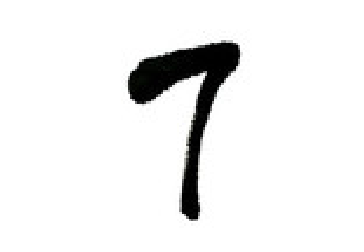

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
# define a simple data batch
from collections import namedtuple
Batch = namedtuple('Batch', ['data'])

def get_image(path, show=False):
    # download and show the image
    img = cv2.cvtColor(cv2.imread('C:/Users/zhaoyu/Desktop/7.jpg'), cv2.COLOR_BGR2RGB)
    if img is None:
         return None
    if show:
         plt.imshow(img)
         plt.axis('off')
    # convert into format (batch, RGB, width, height)
    img = cv2.resize(img, (224, 224))
    img = np.swapaxes(img, 0, 2)
    img = np.swapaxes(img, 1, 2)
    img = img[np.newaxis, :]
    return img

def predict(path):
    img = get_image(path, show=True)
    # compute the predict probabilities
    mod.forward(Batch([mx.nd.array(img)]))
    prob = mod.get_outputs()[0].asnumpy()
    # print the top-5
    prob = np.squeeze(prob)
    a = np.argsort(prob)[::-1]
    for i in a[0:5]:
        print('probability=%f, class=%s' %(prob[i], labels[i]))

ValueError: cannot reshape array of size 39060 into shape (93,1,28,28)

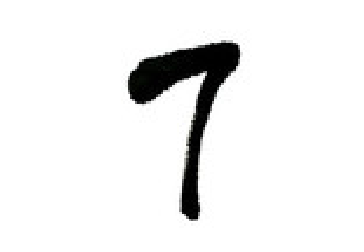

In [3]:
predict('C:/Users/zhaoyu/Desktop/7.jpg')
